## Pair Programming Group 13
### Rutuja Kokate (017453865)
### Parth Marathe (017411199)

# Implemention of Pretrained YOLO V8 model

### We install the ultralytics and roboflow libraries, then runs a system check using ultralytics to ensure the environment is properly configured for running YOLO models.

In [1]:
!pip install ultralytics
!pip install roboflow

import ultralytics
ultralytics.checks()

Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


### We copy the entire contents of the `original_directory` (containing road sign data) to the `new_directory` using the `shutil.copytree()` function, creating an exact duplicate of the folder and its subdirectories.

We are doing this step on kaggle since we needed to update the path of yaml file and hence in order to update the file we had to move the file to working directory of kaggle

In [2]:
import shutil

original_directory = "/kaggle/input/traffic-sign-detection-dataset/Road_Sign_Detection  3"
new_directory = "/kaggle/working/Traffic_Signs"

shutil.copytree(original_directory, new_directory)

'/kaggle/working/Traffic_Signs'

Loading the Yolov8n pretrained model

In [3]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 76.1MB/s]


In [5]:
!pip install wandb























   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 61.3 MB/s eta 0:00:00:00:0100:01




### Opens and reads the content of the data.yaml file from the specified directory and prints it to the console. The data.yaml file contains important configuration details for the YOLO model, such as the dataset paths, class labels, number of classes, and other training-related parameters

In [7]:
# Display the content of data.yaml
with open('/kaggle/working/Traffic_Signs/data.yaml', 'r') as file:
    content = file.read()

print(content)

train: ../train/images

val: ../valid/images

test: ../test/images



nc: 25

names: ['-Road narrows on right', 'Attention Please-', 'Beware of children', 'CYCLE ROUTE AHEAD WARNING', 'Crosswalk', 'Dangerous Left Curve Ahead', 'Dangerous Rright Curve Ahead', 'No Entry', 'No_Over_Taking', 'One way road', 'Speed bump ahead', 'Speed limit', 'Speed limit 100 Kph', 'Speed limit 120 Kph', 'Speed limit 20 Kph', 'Speed limit 30 Kph', 'Speed limit 40 Kph', 'Speed limit 50 Kph', 'Speed limit 60 Kph', 'Speed limit 70 Kph', 'Speed limit 80 Kph', 'Speed limit 90 Kph', 'Stop_Sign', 'Uneven Road', 'roundabout']






### We modify the data.yaml file with corrected paths and class information

In [3]:
# Correct the paths in data.yaml
data_yaml_path = '/kaggle/working/Traffic_Signs/data.yaml'

# New content for data.yaml
new_content = """
train: train/images
val: valid/images
test: test
nc: 25
names: ['-Road narrows on right', 'Attention Please-', 'Beware of children', 'CYCLE ROUTE AHEAD WARNING', 'Crosswalk',
        'Dangerous Left Curve Ahead', 'Dangerous Right Curve Ahead', 'No Entry', 'No_Over_Taking', 'One way road', 
        'Speed bump ahead', 'Speed limit', 'Speed limit 100 Kph', 'Speed limit 120 Kph', 'Speed limit 20 Kph', 
        'Speed limit 30 Kph', 'Speed limit 40 Kph', 'Speed limit 50 Kph', 'Speed limit 60 Kph', 'Speed limit 70 Kph', 
        'Speed limit 80 Kph', 'Speed limit 90 Kph', 'Stop_Sign', 'Uneven Road', 'roundabout']
"""

# Write the new content to data.yaml
with open(data_yaml_path, 'w') as file:
    file.write(new_content)

print("Updated data.yaml with corrected paths.")


Updated data.yaml with corrected paths.


In [4]:
# Display the content of data.yaml
with open('/kaggle/working/Traffic_Signs/data.yaml', 'r') as file:
    content = file.read()

print(content)


train: train/images
val: valid/images
test: test
nc: 25
names: ['-Road narrows on right', 'Attention Please-', 'Beware of children', 'CYCLE ROUTE AHEAD WARNING', 'Crosswalk',
        'Dangerous Left Curve Ahead', 'Dangerous Right Curve Ahead', 'No Entry', 'No_Over_Taking', 'One way road', 
        'Speed bump ahead', 'Speed limit', 'Speed limit 100 Kph', 'Speed limit 120 Kph', 'Speed limit 20 Kph', 
        'Speed limit 30 Kph', 'Speed limit 40 Kph', 'Speed limit 50 Kph', 'Speed limit 60 Kph', 'Speed limit 70 Kph', 
        'Speed limit 80 Kph', 'Speed limit 90 Kph', 'Stop_Sign', 'Uneven Road', 'roundabout']



### We train the YOLO model for 40 epochs using 640x640 images with dataset configurations from data.yaml.

In [11]:
import wandb

# Disable W&B logging
wandb.init(mode="disabled")

# Train the model
model.train(data='/kaggle/working/Traffic_Signs/data.yaml', epochs=40, imgsz=640)

Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/Traffic_Signs/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 755k/755k [00:00<00:00, 14.1MB/s]

2024-10-27 03:03:01,766	INFO util.py:124 -- Outdated packages:

  ipywidgets==7.7.1 found, needs ipywidgets>=8

Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.

2024-10-27 03:03:02,709	INFO util.py:124 -- Outdated packages:

  ipywidgets==7.7.1 found, needs ipywidgets>=8

Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=25



                   from  n    params  module                                       arguments                     

  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 

  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                

  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             

  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                

  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             

  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               

  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           

  7                  -1  1    295424  

100%|██████████| 5.35M/5.35M [00:04<00:00, 1.17MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/Traffic_Signs/train/labels... 5325 images, 12 backgrounds, 0 corrupt: 100%|██████████| 5325/5325 [00:05<00:00, 950.49it/s]


train: New cache created: /kaggle/working/Traffic_Signs/train/labels.cache

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.

  check_for_updates()

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

  self.pid = os.fork()

val: Scanning /kaggle/working/Traffic_Signs/valid/labels... 623 images, 1 backgrounds, 0 corrupt: 100%|██████████| 623/623 [00:00<00:00, 907.11it/s]

val: New cache created: /kaggle/working/Traffic_Signs/valid/labels.cache


Plotting labels to runs/detect/train3/labels.jpg... 

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 

optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)

TensorBoard: model graph visualization added ✅

Image sizes 640 train, 640 val

Using 2 dataloader workers

Logging results to runs/detect/train3

Starting training for 40 epochs...



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      2.26G     0.8666      3.342      1.279         29        640: 100%|██████████| 333/333 [01:04<00:00,  5.18it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.84it/s]


                   all        623        801       0.41      0.454      0.452      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      2.23G     0.7992      2.105      1.195         38        640: 100%|██████████| 333/333 [01:01<00:00,  5.43it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.00it/s]

                   all        623        801      0.646      0.657      0.691      0.546




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      2.22G     0.7784      1.699      1.184         34        640: 100%|██████████| 333/333 [01:00<00:00,  5.55it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.97it/s]

                   all        623        801      0.746      0.706      0.761      0.609




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      2.22G     0.7721      1.426      1.177         19        640: 100%|██████████| 333/333 [01:00<00:00,  5.51it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.02it/s]

                   all        623        801      0.779       0.76      0.799       0.65




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      2.23G     0.7482      1.252      1.151         24        640: 100%|██████████| 333/333 [01:00<00:00,  5.51it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.02it/s]

                   all        623        801      0.836      0.791      0.865        0.7




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      2.22G     0.7298      1.113      1.139         44        640: 100%|██████████| 333/333 [00:59<00:00,  5.63it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.09it/s]

                   all        623        801       0.82      0.835      0.876      0.708




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      2.22G     0.7226       1.01      1.131         24        640: 100%|██████████| 333/333 [00:58<00:00,  5.70it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.16it/s]

                   all        623        801      0.861      0.829      0.898      0.722




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      2.22G     0.7096     0.9359      1.122         33        640: 100%|██████████| 333/333 [00:57<00:00,  5.76it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.21it/s]

                   all        623        801      0.885      0.835      0.912       0.75




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      2.23G     0.7032     0.8783       1.12         38        640: 100%|██████████| 333/333 [00:57<00:00,  5.77it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.90it/s]

                   all        623        801      0.843      0.866      0.907      0.739




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      2.23G     0.6932     0.8208      1.113         28        640: 100%|██████████| 333/333 [00:56<00:00,  5.87it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.81it/s]

                   all        623        801      0.895      0.871      0.919      0.756




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      2.24G      0.683     0.7814      1.105         37        640: 100%|██████████| 333/333 [00:57<00:00,  5.77it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.08it/s]

                   all        623        801      0.917       0.88      0.937      0.766




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      2.22G     0.6804      0.752      1.105         33        640: 100%|██████████| 333/333 [00:58<00:00,  5.72it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.15it/s]

                   all        623        801      0.918      0.866      0.936      0.775




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      2.23G     0.6654     0.7131      1.095         41        640: 100%|██████████| 333/333 [00:57<00:00,  5.76it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.18it/s]

                   all        623        801      0.895      0.899      0.929      0.768




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      2.23G     0.6633     0.6808      1.089         29        640: 100%|██████████| 333/333 [00:59<00:00,  5.62it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.12it/s]

                   all        623        801      0.931      0.881       0.94      0.777




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      2.24G     0.6508     0.6749      1.094         42        640: 100%|██████████| 333/333 [00:57<00:00,  5.78it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.09it/s]

                   all        623        801       0.93      0.898      0.949      0.788




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      2.22G     0.6477     0.6451      1.081         30        640: 100%|██████████| 333/333 [00:58<00:00,  5.71it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.21it/s]

                   all        623        801      0.926      0.906      0.951      0.792




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      2.24G     0.6402     0.6275      1.076         27        640: 100%|██████████| 333/333 [00:57<00:00,  5.77it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.29it/s]

                   all        623        801      0.904      0.894      0.937      0.777




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      2.22G     0.6339     0.6043      1.076         32        640: 100%|██████████| 333/333 [00:58<00:00,  5.72it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.17it/s]

                   all        623        801      0.931      0.889      0.952      0.791




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      2.22G       0.63     0.5947      1.073         35        640: 100%|██████████| 333/333 [00:59<00:00,  5.62it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.12it/s]

                   all        623        801        0.9      0.915      0.949      0.797




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      2.22G     0.6246     0.5783      1.068         28        640: 100%|██████████| 333/333 [00:59<00:00,  5.60it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.98it/s]

                   all        623        801      0.917      0.921      0.958      0.802




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      2.22G     0.6136     0.5686      1.065         37        640: 100%|██████████| 333/333 [01:00<00:00,  5.47it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.06it/s]

                   all        623        801      0.939      0.916      0.953      0.794




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      2.24G     0.6147     0.5615      1.067         25        640: 100%|██████████| 333/333 [01:00<00:00,  5.53it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.97it/s]

                   all        623        801      0.913      0.924      0.956        0.8




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      2.24G     0.6084     0.5417       1.06         38        640: 100%|██████████| 333/333 [00:59<00:00,  5.63it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.18it/s]

                   all        623        801      0.906      0.919      0.945      0.786




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      2.22G     0.5992     0.5189      1.053         33        640: 100%|██████████| 333/333 [00:58<00:00,  5.67it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.22it/s]

                   all        623        801      0.929      0.913      0.951      0.788




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      2.24G     0.5873     0.5153      1.049         33        640: 100%|██████████| 333/333 [00:58<00:00,  5.73it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.04it/s]

                   all        623        801      0.924      0.909      0.949      0.794




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      2.23G     0.5854     0.5039      1.049         28        640: 100%|██████████| 333/333 [00:58<00:00,  5.73it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.16it/s]

                   all        623        801      0.934      0.905      0.949      0.793




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      2.22G     0.5872      0.504      1.046         33        640: 100%|██████████| 333/333 [00:58<00:00,  5.72it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.31it/s]

                   all        623        801      0.919      0.912      0.948      0.796




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      2.22G     0.5762     0.4889      1.042         28        640: 100%|██████████| 333/333 [00:58<00:00,  5.69it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.83it/s]

                   all        623        801      0.932      0.918      0.956      0.794




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      2.23G     0.5755     0.4725      1.044         34        640: 100%|██████████| 333/333 [00:57<00:00,  5.80it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.92it/s]

                   all        623        801      0.936      0.911      0.957      0.803




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      2.24G     0.5686     0.4681      1.039         29        640: 100%|██████████| 333/333 [00:57<00:00,  5.75it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.24it/s]

                   all        623        801      0.942      0.904      0.953      0.798


Closing dataloader mosaic

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

  self.pid = os.fork()

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

  self.pid = os.fork()




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      2.22G     0.5078     0.3417      1.008         13        640: 100%|██████████| 333/333 [00:55<00:00,  5.99it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.37it/s]

                   all        623        801      0.928      0.928      0.951      0.791




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      2.22G     0.4963     0.3203     0.9919         15        640: 100%|██████████| 333/333 [00:55<00:00,  5.99it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.35it/s]

                   all        623        801      0.941      0.912      0.955      0.795




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      2.23G     0.4862     0.3142     0.9856         16        640: 100%|██████████| 333/333 [00:55<00:00,  5.97it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.32it/s]

                   all        623        801      0.939      0.925      0.953      0.798




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      2.22G     0.4759     0.3083     0.9808         17        640: 100%|██████████| 333/333 [00:56<00:00,  5.92it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.33it/s]

                   all        623        801      0.931      0.921       0.95        0.8




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      2.22G     0.4692     0.2972     0.9791         16        640: 100%|██████████| 333/333 [00:55<00:00,  6.04it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.26it/s]

                   all        623        801       0.94      0.917      0.952      0.798




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      2.22G     0.4614     0.2913      0.973         17        640: 100%|██████████| 333/333 [00:56<00:00,  5.93it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.96it/s]

                   all        623        801      0.934      0.925      0.949      0.797




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      2.23G     0.4552     0.2832     0.9725         16        640: 100%|██████████| 333/333 [00:56<00:00,  5.90it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.80it/s]

                   all        623        801      0.933      0.927      0.947      0.797




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      2.22G     0.4479     0.2819     0.9655         18        640: 100%|██████████| 333/333 [00:55<00:00,  5.99it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.30it/s]

                   all        623        801      0.938      0.918      0.947      0.795




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      2.22G     0.4462     0.2758     0.9631         16        640: 100%|██████████| 333/333 [00:55<00:00,  5.95it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.39it/s]

                   all        623        801      0.932       0.92      0.948      0.797




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      2.22G     0.4395       0.27     0.9559         17        640: 100%|██████████| 333/333 [00:55<00:00,  5.96it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.35it/s]

                   all        623        801      0.943      0.915      0.948      0.797




40 epochs completed in 0.701 hours.

Optimizer stripped from runs/detect/train3/weights/last.pt, 6.3MB

Optimizer stripped from runs/detect/train3/weights/best.pt, 6.3MB



Validating runs/detect/train3/weights/best.pt...

Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

Model summary (fused): 168 layers, 3,010,523 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.17it/s]


                   all        623        801      0.936      0.911      0.957      0.803

-Road narrows on right         15         15      0.924      0.933      0.982      0.872

     Attention Please-         23         23      0.956          1      0.995      0.896

    Beware of children         23         23      0.982      0.913      0.951      0.825

CYCLE ROUTE AHEAD WARNING         29         29          1      0.962      0.987      0.873

             Crosswalk         42         43      0.887       0.93      0.934      0.699

Dangerous Left Curve Ahead         24         24      0.662      0.875      0.813      0.671

Dangerous Right Curve Ahead         30         30      0.912      0.695      0.852      0.714

              No Entry         26         27      0.959          1      0.995      0.913

        No_Over_Taking         23         23          1      0.974      0.995      0.714

          One way road         27         27      0.975      0.815      0.897      0.775

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f0eddaf93f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,  

### We Evaluate the trained YOLO v8 model, print the mean Intersection over Union (IoU) at 0.5 (mAP@0.5), and the averaged mAP across IoU thresholds from 0.5 to 0.95 (mAP@0.5:0.95).

### 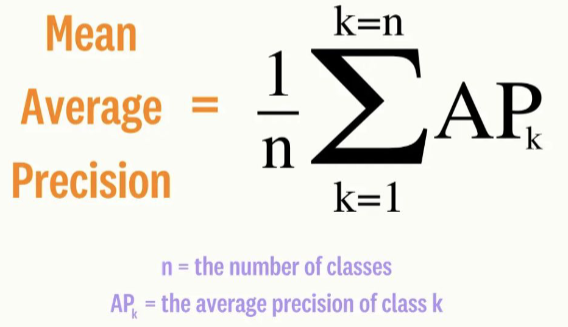

In [12]:
# Evaluate the trained model to see performance metrics, including IoU
metrics = model.val()

# Print the IoU metric from the evaluation results
print(f"Mean IoU: {metrics.box.map50}")  # mAP@0.5, which corresponds to IoU@0.5
print(f"Mean IoU@0.5:0.95: {metrics.box.map}")  # mAP@0.5:0.95, which averages IoU from 0.5 to 0.95


Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

Model summary (fused): 168 layers, 3,010,523 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/working/Traffic_Signs/valid/labels.cache... 623 images, 1 backgrounds, 0 corrupt: 100%|██████████| 623/623 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

  self.pid = os.fork()

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:06<00:00,  6.31it/s]


                   all        623        801      0.936       0.91      0.957      0.803

-Road narrows on right         15         15      0.925      0.933      0.982      0.872

     Attention Please-         23         23      0.958          1      0.995      0.898

    Beware of children         23         23      0.982      0.913      0.951      0.816

CYCLE ROUTE AHEAD WARNING         29         29          1      0.962      0.987      0.873

             Crosswalk         42         43      0.887       0.93      0.934      0.701

Dangerous Left Curve Ahead         24         24      0.664      0.875      0.813      0.671

Dangerous Right Curve Ahead         30         30      0.912      0.692      0.851      0.713

              No Entry         26         27       0.96          1      0.995      0.913

        No_Over_Taking         23         23          1      0.973      0.995      0.713

          One way road         27         27      0.976      0.815      0.897      0.775

### The YOLO V8 model achieved a commendable overall performance with a mean average precision (mAP) of 0.957 at IoU 0.5 and 0.803 at IoU 0.5-0.95 across 623 images. Most traffic sign classes exhibited strong precision and recall, notably "Attention Please-" (mAP 0.995) and "No Entry" (mAP 0.995), indicating effective detection. However, some classes, such as "Dangerous Left Curve Ahead" and "roundabout," showed lower precision (0.664 and 0.725, respectively), suggesting areas for improvement. The model maintained efficient processing times, demonstrating its suitability for real-time applications.

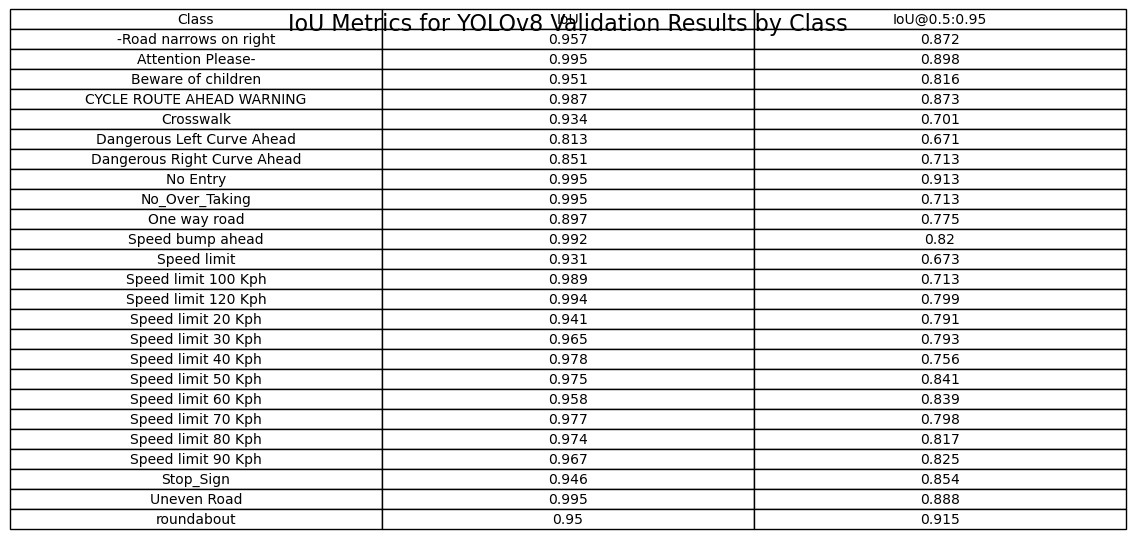

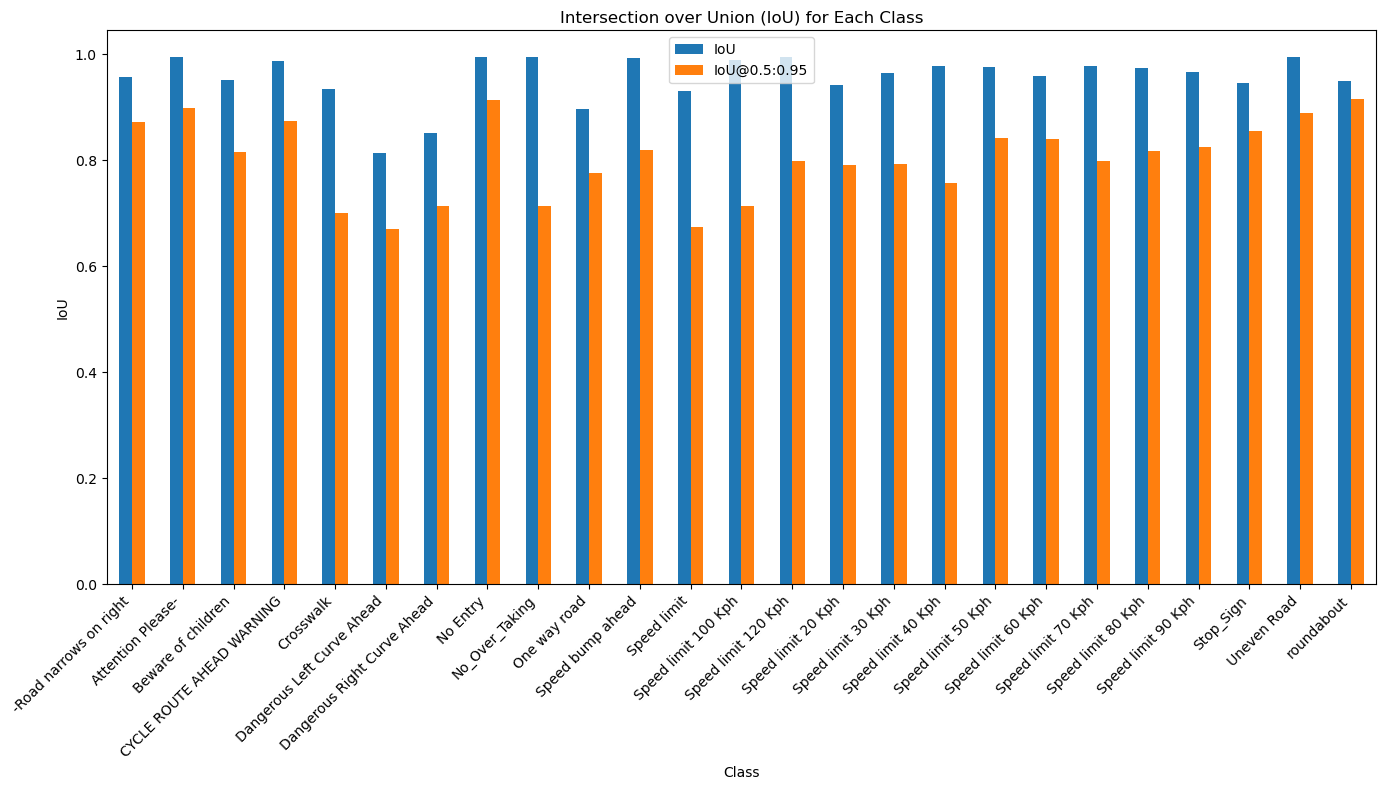

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Data for IoU metrics from the validation results
iou_data = {
    'Class': ['-Road narrows on right', 'Attention Please-', 'Beware of children', 
              'CYCLE ROUTE AHEAD WARNING', 'Crosswalk', 'Dangerous Left Curve Ahead', 
              'Dangerous Right Curve Ahead', 'No Entry', 'No_Over_Taking', 
              'One way road', 'Speed bump ahead', 'Speed limit', 
              'Speed limit 100 Kph', 'Speed limit 120 Kph', 'Speed limit 20 Kph', 
              'Speed limit 30 Kph', 'Speed limit 40 Kph', 'Speed limit 50 Kph', 
              'Speed limit 60 Kph', 'Speed limit 70 Kph', 'Speed limit 80 Kph', 
              'Speed limit 90 Kph', 'Stop_Sign', 'Uneven Road', 'roundabout'],
    'IoU': [0.957, 0.995, 0.951, 0.987, 0.934, 0.813, 0.851, 0.995, 0.995, 0.897, 
            0.992, 0.931, 0.989, 0.994, 0.941, 0.965, 0.978, 0.975, 0.958, 0.977, 
            0.974, 0.967, 0.946, 0.995, 0.95],
    'IoU@0.5:0.95': [0.872, 0.898, 0.816, 0.873, 0.701, 0.671, 0.713, 0.913, 0.713, 0.775, 
                     0.82, 0.673, 0.713, 0.799, 0.791, 0.793, 0.756, 0.841, 0.839, 0.798, 
                     0.817, 0.825, 0.854, 0.888, 0.915]
}

# Creating DataFrame from the IoU data
df_iou = pd.DataFrame(iou_data)

# Plotting tables for IoU metrics
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')
ax.axis('tight')
table = ax.table(cellText=df_iou.values, colLabels=df_iou.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title("IoU Metrics for YOLOv8 Validation Results by Class", fontsize=16)
plt.show()

# Plotting IoU@0.5 and IoU@0.5:0.95 for each class
fig, ax = plt.subplots(figsize=(14, 8))
df_iou.plot(x='Class', y=['IoU', 'IoU@0.5:0.95'], kind='bar', ax=ax)
ax.set_title('Intersection over Union (IoU) for Each Class')
ax.set_xlabel('Class')
ax.set_ylabel('IoU')
ax.set_xticklabels(df_iou['Class'], rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


# Observation of Results

**Overall Performance**
Mean Average Precision (mAP50): 0.957
Mean Average Precision (mAP50-95): 0.803
Precision: 0.936
Recall: 0.911

**Class-wise Performance**
Most classes, like "Attention Please-", "Beware of children", and "Speed limit 120 Kph", achieved near-perfect performance with mAP values close to 0.99.
Some classes, such as "Dangerous Left Curve Ahead" and "Crosswalk", showed lower mAP50-95 values (0.671 and 0.699, respectively), indicating areas for improvement.
Classes like "No_Over_Taking", "No Entry", and "Speed bump ahead" achieved high precision and recall, with mAP values close to 0.99, demonstrating strong detection capabilities.

**Inference Speed**
The average inference time was around 2.1 ms per image, suggesting efficient processing on the Tesla T4 GPU.
These results indicate that your model is performing well in detecting road signs, but you could further improve by fine-tuning specific classes with lower performance, such as "Dangerous Left Curve Ahead" and "Crosswalk".

In [19]:
# Evaluate the model on the test set
# metrics_test = model.val(split='test')  # Specify the 'test' split from data.yaml
# Make predictions on the test set
results = model.predict(source='/kaggle/working/Traffic_Signs/test', save=True)

# Print the predictions or save them
# results.save()  




image 1/308 /kaggle/working/Traffic_Signs/test/00000_00000_00000_png_jpg.rf.fe38518f555b8b4d139ed0a31adee9fc.jpg: 640x640 1 Speed limit 20 Kph, 10.2ms

image 2/308 /kaggle/working/Traffic_Signs/test/00000_00000_00014_png_jpg.rf.da4d304ccb4fd7555f5c291bed572107.jpg: 640x640 1 Beware of children, 1 Speed limit 20 Kph, 7.3ms

image 3/308 /kaggle/working/Traffic_Signs/test/00000_00000_00018_png_jpg.rf.4eff8cf87317fad6622f1d00b81d575e.jpg: 640x640 1 Speed limit 20 Kph, 7.3ms

image 4/308 /kaggle/working/Traffic_Signs/test/00000_00000_00019_png_jpg.rf.923c0a404dce9e2518dcff1a64cd7e04.jpg: 640x640 1 Speed limit 20 Kph, 7.3ms

image 5/308 /kaggle/working/Traffic_Signs/test/00000_00000_00021_png_jpg.rf.f0f74c580fb71be6df258535e2d301af.jpg: 640x640 1 Speed limit 20 Kph, 7.3ms

image 6/308 /kaggle/working/Traffic_Signs/test/00000_00000_00022_png_jpg.rf.66ace55a624f81aacdd7c0e797a807ed.jpg: 640x640 1 Speed limit 20 Kph, 7.3ms

image 7/308 /kaggle/working/Traffic_Signs/test/00000_00000_00026_png_

In [20]:
!zip -r /kaggle/working/working_directory.zip /kaggle/working

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

  pid, fd = os.forkpty()


  adding: kaggle/working/ (stored 0%)

  adding: kaggle/working/yolo11n.pt (deflated 11%)

  adding: kaggle/working/yolov8n.pt (deflated 9%)

  adding: kaggle/working/Traffic_Signs/ (stored 0%)

  adding: kaggle/working/Traffic_Signs/test.cache (deflated 72%)

  adding: kaggle/working/Traffic_Signs/train/ (stored 0%)

  adding: kaggle/working/Traffic_Signs/train/labels/ (stored 0%)

  adding: kaggle/working/Traffic_Signs/train/labels/road157_png.rf.0d6a348a9714fbb49b48d7fccac8ecc8.txt (deflated 47%)

  adding: kaggle/working/Traffic_Signs/train/labels/road90_png_jpg.rf.4187b0ede27e65c412f146372a677972.txt (deflated 19%)

  adding: kaggle/working/Traffic_Signs/train/labels/road602_png.rf.7f20ee76a29f0553d30e7f56baf51b53.txt (deflated 16%)

  adding: kaggle/working/Traffic_Signs/train/labels/00019_00003_00025_png_jpg.rf.26de48ea974b86cab0afa0196c690191.txt (deflated 24%)

  adding: kaggle/working/Traffic_Signs/train/labels/00019_00001_00021_png_jpg.rf.1141e4ebd83cdbda0fd61e1be7e6599b.txt

### Predicts classes for test images using a model, stores the results in a CSV file with filenames and predicted classes.¶

In [28]:
import pandas as pd
import os
import yaml

# Load class names from data.yaml
with open('/kaggle/working/Traffic_Signs/data.yaml', 'r') as file:
    data_yaml = yaml.safe_load(file)

# Get the class names from data.yaml
class_names = data_yaml['names']

# Path to the test images
test_images_path = '/kaggle/working/Traffic_Signs/test'

# Make predictions on the test set
results = model.predict(source=test_images_path)

# Initialize a list to store the results
predictions = []

# Loop through the results and extract predictions
for result in results:
    # Extract predicted classes for each image
    for box in result.boxes:
        class_idx = int(box.cls.cpu().numpy().item())  # Convert to integer
        class_name = class_names[class_idx]  # Map index to class name
        predictions.append({
            'filename': os.path.basename(result.path),  # Get only the image name
            'class': class_name  # Use the class name instead of label index
        })

# Convert the results to a DataFrame
predictions_df = pd.DataFrame(predictions)

# Define the CSV file path
csv_file_path = '/kaggle/working/predictions.csv'

# Save to a CSV file with only filename and class columns
predictions_df.to_csv(csv_file_path, index=False)

# Print the CSV file path to confirm
print(f"CSV file created: {csv_file_path}")




image 1/308 /kaggle/working/Traffic_Signs/test/00000_00000_00000_png_jpg.rf.fe38518f555b8b4d139ed0a31adee9fc.jpg: 640x640 1 Speed limit 20 Kph, 9.0ms

image 2/308 /kaggle/working/Traffic_Signs/test/00000_00000_00014_png_jpg.rf.da4d304ccb4fd7555f5c291bed572107.jpg: 640x640 1 Beware of children, 1 Speed limit 20 Kph, 7.3ms

image 3/308 /kaggle/working/Traffic_Signs/test/00000_00000_00018_png_jpg.rf.4eff8cf87317fad6622f1d00b81d575e.jpg: 640x640 1 Speed limit 20 Kph, 7.3ms

image 4/308 /kaggle/working/Traffic_Signs/test/00000_00000_00019_png_jpg.rf.923c0a404dce9e2518dcff1a64cd7e04.jpg: 640x640 1 Speed limit 20 Kph, 7.3ms

image 5/308 /kaggle/working/Traffic_Signs/test/00000_00000_00021_png_jpg.rf.f0f74c580fb71be6df258535e2d301af.jpg: 640x640 1 Speed limit 20 Kph, 7.3ms

image 6/308 /kaggle/working/Traffic_Signs/test/00000_00000_00022_png_jpg.rf.66ace55a624f81aacdd7c0e797a807ed.jpg: 640x640 1 Speed limit 20 Kph, 7.3ms

image 7/308 /kaggle/working/Traffic_Signs/test/00000_00000_00026_png_j

In [30]:
!zip -r /kaggle/working/working_directory.zip /kaggle/working

updating: kaggle/working/ (stored 0%)

updating: kaggle/working/yolo11n.pt (deflated 11%)

updating: kaggle/working/yolov8n.pt (deflated 9%)

updating: kaggle/working/Traffic_Signs/ (stored 0%)

updating: kaggle/working/Traffic_Signs/test.cache (deflated 72%)

updating: kaggle/working/Traffic_Signs/train/ (stored 0%)

updating: kaggle/working/Traffic_Signs/train/labels/ (stored 0%)

updating: kaggle/working/Traffic_Signs/train/labels/road157_png.rf.0d6a348a9714fbb49b48d7fccac8ecc8.txt (deflated 47%)

updating: kaggle/working/Traffic_Signs/train/labels/road90_png_jpg.rf.4187b0ede27e65c412f146372a677972.txt (deflated 19%)

updating: kaggle/working/Traffic_Signs/train/labels/road602_png.rf.7f20ee76a29f0553d30e7f56baf51b53.txt (deflated 16%)

updating: kaggle/working/Traffic_Signs/train/labels/00019_00003_00025_png_jpg.rf.26de48ea974b86cab0afa0196c690191.txt (deflated 24%)

updating: kaggle/working/Traffic_Signs/train/labels/00019_00001_00021_png_jpg.rf.1141e4ebd83cdbda0fd61e1be7e6599b.txt

In [5]:
from ultralytics import YOLO
# Load the model with best weights
model = YOLO('/kaggle/input/yolo-v8-weights/best.pt')

In [6]:
# Make predictions on test images and save results
results = model.predict(source='/kaggle/working/Traffic_Signs/test', conf=0.25, save=True)


image 1/308 /kaggle/working/Traffic_Signs/test/00000_00000_00000_png_jpg.rf.fe38518f555b8b4d139ed0a31adee9fc.jpg: 640x640 1 Speed limit 20 Kph, 7.5ms
image 2/308 /kaggle/working/Traffic_Signs/test/00000_00000_00014_png_jpg.rf.da4d304ccb4fd7555f5c291bed572107.jpg: 640x640 1 Beware of children, 1 Speed limit 20 Kph, 7.5ms
image 3/308 /kaggle/working/Traffic_Signs/test/00000_00000_00018_png_jpg.rf.4eff8cf87317fad6622f1d00b81d575e.jpg: 640x640 1 Speed limit 20 Kph, 7.4ms
image 4/308 /kaggle/working/Traffic_Signs/test/00000_00000_00019_png_jpg.rf.923c0a404dce9e2518dcff1a64cd7e04.jpg: 640x640 1 Speed limit 20 Kph, 7.4ms
image 5/308 /kaggle/working/Traffic_Signs/test/00000_00000_00021_png_jpg.rf.f0f74c580fb71be6df258535e2d301af.jpg: 640x640 1 Speed limit 20 Kph, 7.4ms
image 6/308 /kaggle/working/Traffic_Signs/test/00000_00000_00022_png_jpg.rf.66ace55a624f81aacdd7c0e797a807ed.jpg: 640x640 1 Speed limit 20 Kph, 7.4ms
image 7/308 /kaggle/working/Traffic_Signs/test/00000_00000_00026_png_jpg.rf.7

### Randomly selects 10 images from a specified directory of predictions and displays them in a 2x5 grid using Matplotlib

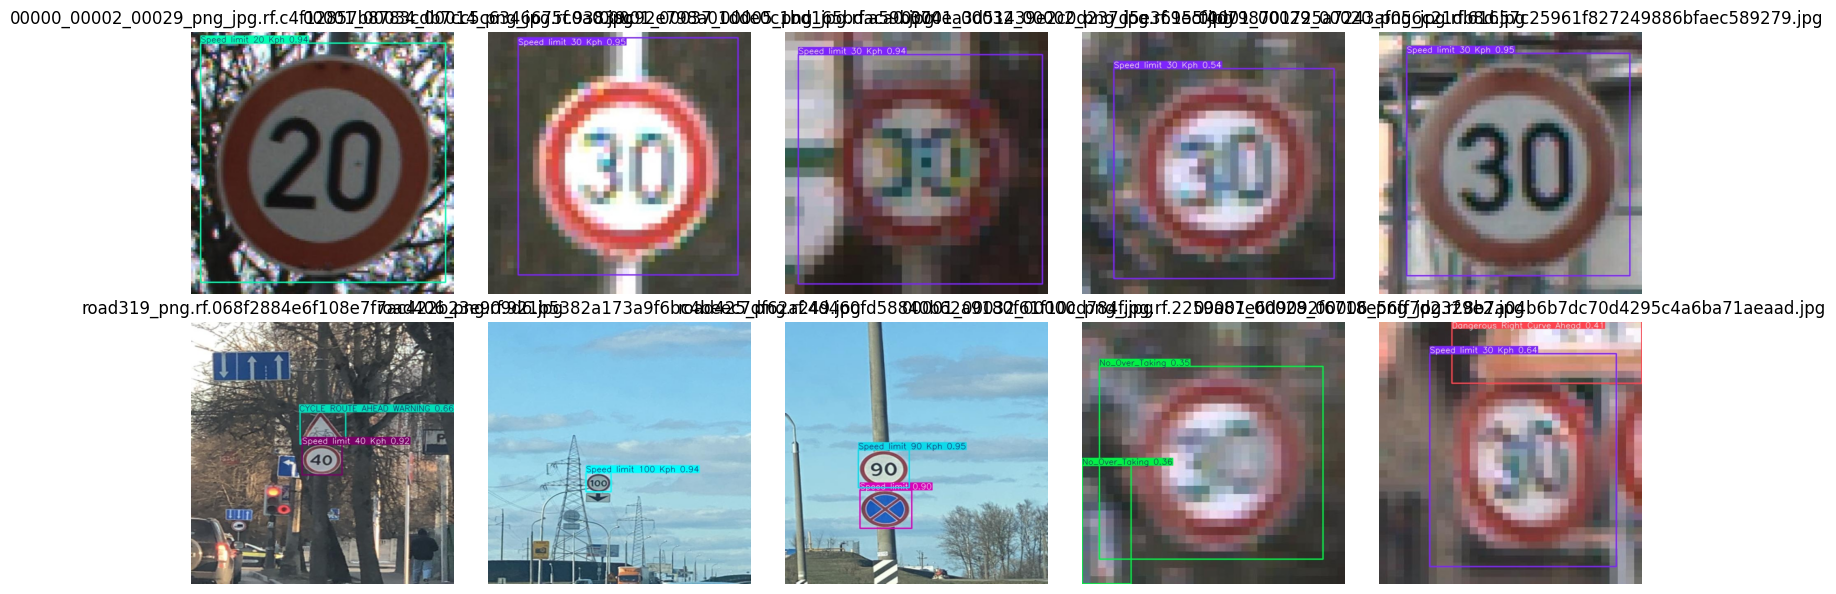

In [11]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Set the path to the directory where the predictions were saved
predictions_dir = '/kaggle/working/runs/detect/predict'  # Update this to your save directory

# Get a list of all images in the directory
image_files = [f for f in os.listdir(predictions_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Randomly select 10 images from the list
random_images = random.sample(image_files, 10)

# Plot the 10 random images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for img, ax in zip(random_images, axes):
    img_path = os.path.join(predictions_dir, img)
    image = Image.open(img_path)
    ax.imshow(image)
    ax.set_title(img)
    ax.axis('off')

plt.tight_layout()
plt.show()


### Predicts class names and bounding box coordinates for test images using a model, then stores the results in a CSV file containing the image filenames, predicted classes, and bounding box coordinates.

In [13]:
# Code to predict the bounding box coordinates as well
import pandas as pd
import os
import yaml

# Load class names from data.yaml
with open('/kaggle/working/Traffic_Signs/data.yaml', 'r') as file:
    data_yaml = yaml.safe_load(file)

# Get the class names from data.yaml
class_names = data_yaml['names']

# Path to the test images
test_images_path = '/kaggle/working/Traffic_Signs/test'

# Make predictions on the test set
results = model.predict(source=test_images_path)

# Initialize a list to store results
predictions_list = []

# Loop through the results and extract predictions
for result in results:
    image_name = os.path.basename(result.path)  # Get only the image name
    classes = []  # List to store class names for the current image
    bboxes = []   # List to store bounding box coordinates

    # Extract predicted classes and bounding boxes for each image
    for box in result.boxes:
        class_idx = int(box.cls.cpu().numpy().item())  # Convert to integer
        class_name = class_names[class_idx]  # Map index to class name
        classes.append(class_name)

        # Extract bounding box coordinates (x, y, width, height)
        x, y, w, h = box.xywh[0].cpu().numpy()
        bbox_str = f"({x:.2f}, {y:.2f}, {w:.2f}, {h:.2f})"
        bboxes.append(bbox_str)

    # Join the classes and bounding boxes into strings separated by commas
    classes_str = ', '.join(classes)
    bboxes_str = ', '.join(bboxes)

    # Store the results in the list as a tuple
    predictions_list.append((image_name, classes_str, bboxes_str))

# Convert the list to a DataFrame
predictions_df = pd.DataFrame(predictions_list, columns=['filename', 'classes', 'bounding_boxes'])

# Define the CSV file path
csv_file_path = '/kaggle/working/predictions.csv'

# Save to a CSV file with filename, classes, and bounding_boxes columns
predictions_df.to_csv(csv_file_path, index=False)

# Print the CSV file path to confirm
print(f"CSV file created: {csv_file_path}")



image 1/308 /kaggle/working/Traffic_Signs/test/00000_00000_00000_png_jpg.rf.fe38518f555b8b4d139ed0a31adee9fc.jpg: 640x640 1 Speed limit 20 Kph, 8.3ms
image 2/308 /kaggle/working/Traffic_Signs/test/00000_00000_00014_png_jpg.rf.da4d304ccb4fd7555f5c291bed572107.jpg: 640x640 1 Beware of children, 1 Speed limit 20 Kph, 7.4ms
image 3/308 /kaggle/working/Traffic_Signs/test/00000_00000_00018_png_jpg.rf.4eff8cf87317fad6622f1d00b81d575e.jpg: 640x640 1 Speed limit 20 Kph, 7.4ms
image 4/308 /kaggle/working/Traffic_Signs/test/00000_00000_00019_png_jpg.rf.923c0a404dce9e2518dcff1a64cd7e04.jpg: 640x640 1 Speed limit 20 Kph, 7.4ms
image 5/308 /kaggle/working/Traffic_Signs/test/00000_00000_00021_png_jpg.rf.f0f74c580fb71be6df258535e2d301af.jpg: 640x640 1 Speed limit 20 Kph, 7.4ms
image 6/308 /kaggle/working/Traffic_Signs/test/00000_00000_00022_png_jpg.rf.66ace55a624f81aacdd7c0e797a807ed.jpg: 640x640 1 Speed limit 20 Kph, 7.4ms
image 7/308 /kaggle/working/Traffic_Signs/test/00000_00000_00026_png_jpg.rf.7

In [14]:
!zip -r /kaggle/working/working_directory.zip /kaggle/working

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/predict/ (stored 0%)
  adding: kaggle/working/runs/detect/predict/00001_00034_00028_png_jpg.rf.c01f4889a8bfa599467c074ceca9e082.jpg (deflated 9%)
  adding: kaggle/working/runs/detect/predict/00001_00018_00016_png_jpg.rf.0469c3ebc56ee39c382a4caf31687573.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/predict/00001_00022_00013_png_jpg.rf.83afedf104acebfd35dba9d195776125.jpg (deflated 17%)
  adding: kaggle/working/runs/detect/predict/00001_00028_00023_png_jpg.rf.db8c75fbd3310033363c6fdc43d24858.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/predict/00001_00038_00024_png_jpg.rf.11f62f29281e5fb5b8f1b3863f216e31.jpg (deflated 10%)
  adding: kaggle/working/runs/detect/predict/road720_png.rf.c1f1eb0e218d9a2b9a595a024450b0e6.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/00001_00031_00024_png_jpg.rf